# SED Processing of CIGALE SED Decomposition fits
This script is used to explore and proccess some of the outputs from the fits files generated by the CIGALE SED decomposition. We intend for this to explore the AGN contribution with a more robust set of tools to see how AGN contamination effects UVJ and other diagnostics.

In [224]:
# Import all required packages
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath


In [225]:
# The aim of this is to see how the SEDs of the galaxies are
# to this end what we do is read in some of the fits files
# Begin by importing just one of the fits files
gal_name= '9367_best_model.fits'
galaxy_path = os.path.join('datasets\student_fits_files\cdfs_best_models_fits', gal_name)
    
# Open the fits files <- needs to be different for CAT vs Fits files
with fits.open(galaxy_path) as data:
    df = pd.DataFrame(np.array(data[1].data).byteswap().newbyteorder())

In [226]:
df # We recall wavelength is in nanometers, we would like to immediately convert this to angstroms




df['wavelength'] = df['wavelength']*10

# For plotting reasons, convert to Janksys
# We are already in mJanksys
df['Snu'] = df['Fnu']*10**-3

# Converting into F_lambda
df['Flambda'] = df['Snu']*(3*10**-5)/(df['wavelength']**2)

In [227]:
df

,wavelength,Fnu,L_lambda_total,stellar.old,stellar.young,nebular.absorption_old,nebular.absorption_young,nebular.lines_old,nebular.lines_young,nebular.continuum_old,...,attenuation.nebular.lines_young,attenuation.nebular.continuum_old,attenuation.nebular.continuum_young,dust,agn.SKIRTOR2016_torus,agn.SKIRTOR2016_polar_dust,agn.SKIRTOR2016_disk,igm,Snu,Flambda
0,1.902700e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000e+00
1,2.184592e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000e+00
2,2.508247e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000e+00
3,2.879853e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000e+00
4,3.306514e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,1.850846e+10,0.000016,6.134977e+18,0.0,0.0,0.0,0.0,0.0,0.0,5.923701e+16,...,-0.0,-7.814515e+06,-8.015084e+08,0.0,0.0,0.0,0.0,0.0,1.634406e-08,1.431333e-33
4771,1.859389e+10,0.000016,6.081121e+18,0.0,0.0,0.0,0.0,0.0,0.0,5.871700e+16,...,-0.0,-7.688700e+06,-7.886039e+08,0.0,0.0,0.0,0.0,0.0,1.635048e-08,1.418768e-33
4772,1.867972e+10,0.000016,6.027728e+18,0.0,0.0,0.0,0.0,0.0,0.0,5.820146e+16,...,-0.0,-7.564892e+06,-7.759054e+08,0.0,0.0,0.0,0.0,0.0,1.635689e-08,1.406311e-33
4773,1.885256e+10,0.000016,5.922350e+18,0.0,0.0,0.0,0.0,0.0,0.0,5.718397e+16,...,-0.0,-7.323233e+06,-7.511193e+08,0.0,0.0,0.0,0.0,0.0,1.636972e-08,1.381726e-33


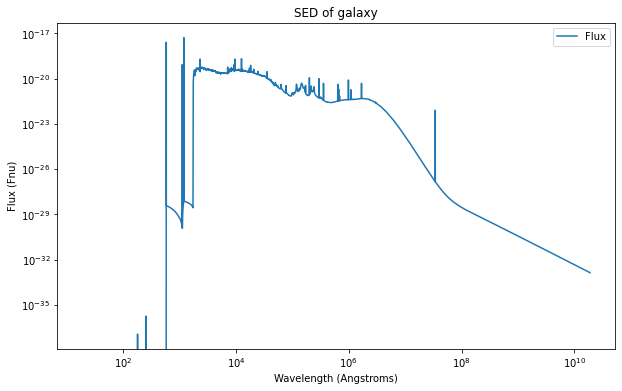

In [228]:

# Only plot between 10^3 and 10^5

# Do a logplot of the lines 
plt.figure(figsize=(10, 6))
plt.loglog(df['wavelength'], df['Flambda'], label='Flux')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (Fnu)')
# Change the limits from 10^3 to 10^5


#plt.ylim(1e-2, 1e2)


plt.title('SED of galaxy')
plt.legend()
plt.show()


In [229]:
# We can see that this kind of works. What we would now like to do, is extend this idea to a few more galaxies. Instead
# of one. We can read in say n number of galaxies, convert to what we use and then plot them all together
# We will be able to see that these galaxies are not restframed, we need to use the exported zpk from a previous file 
# to restframe them.

# Reading in the file containing the id's plus, filed, plus redshift
queiscent_transitions = pd.read_csv('outputs\quiescent_transition_ids.csv')

In [230]:
queiscent_transitions

# we can use something like this
# wavelengths = wavelengths / (1 + float(selected_redshifts[z_id]))

,id,zpk,field
0,22468,1.6739,CDFS
1,16807,1.5228,CDFS
2,11281,1.5864,CDFS
3,10413,1.5003,CDFS
4,13143,1.4925,CDFS
...,...,...,...
434,13883,0.8058,UDS
435,1887,0.4364,UDS
436,17475,1.0974,UDS
437,19012,0.4129,UDS


In [231]:
# now doing this lets select 5 galaxies, and plot their SEDS

# We will use the same code as above, but we will put it in a function, and then call this function for each of the galaxies
# that we have selected

def get_n_seds(n, restframe=False):
    # Select n galaxies
    
    df_list = []
    names = []
    
    selected_galaxies = queiscent_transitions.sample(n)
    # Reset the index
    selected_galaxies = selected_galaxies.reset_index(drop=True)
    
    # name 
    gal_name = selected_galaxies['id'].astype(str)
    
    # field
    gal_field = selected_galaxies['field'].astype(str)
    
    
    names = gal_field + '_' + gal_name
    
    if restframe:
        # redshift
        gal_redshift = selected_galaxies['zpk'].astype(float)
    # Now we will read in the fits files for these galaxies

    for i in range(len(selected_galaxies)):
        path = 'datasets\student_fits_files\\'+ str(gal_field[i]).lower() +'_best_models_fits\\'
        name = str(gal_name[i])+'_best_model.fits'

        galaxy_path = os.path.join(path, name)
        with fits.open(galaxy_path) as data:
            df = pd.DataFrame(np.array(data[1].data).byteswap().newbyteorder())
        
        # Convert to angstroms
        df['wavelength'] = df['wavelength']*10

        if restframe:
            df['wavelength'] = df['wavelength'] / (1 + gal_redshift[i])
        
        # Convert flux values
        df['Snu'] = df['Fnu']*10**-3
        df['Flambda'] = df['Snu']*(3*10**-5)/(df['wavelength']**2)
        
        df_list.append(df)
        
        plt.loglog(df['wavelength'], df['Flambda'])
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Flux (Fnu)')
    #plt.xlim(1e3, 1e5)
    plt.ylim(1e-30, 1e-2)
    plt.title('SED of galaxies')
    plt.legend()
    plt.show()
    
    return df_list, names

No handles with labels found to put in legend.


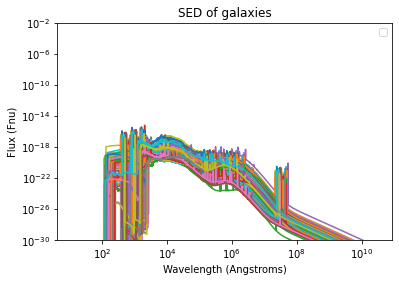

([        wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
  0     1.622200e+01  0.000000    0.000000e+00          0.0            0.0   
  1     1.862535e+01  0.000000    0.000000e+00          0.0            0.0   
  2     2.138476e+01  0.000000    0.000000e+00          0.0            0.0   
  3     2.455299e+01  0.000000    0.000000e+00          0.0            0.0   
  4     2.819061e+01  0.000000    0.000000e+00          0.0            0.0   
  ...            ...       ...             ...          ...            ...   
  4770  1.577991e+10  0.000009    1.862592e+18          0.0            0.0   
  4771  1.585274e+10  0.000009    1.846242e+18          0.0            0.0   
  4772  1.592592e+10  0.000009    1.830031e+18          0.0            0.0   
  4773  1.607328e+10  0.000009    1.798038e+18          0.0            0.0   
  4774  1.622200e+10  0.000009    1.766605e+18          0.0            0.0   
  
        nebular.absorption_old  nebular.absorption_young  neb

In [232]:
# Now that we have the ids + photometric redshifts, 
get_n_seds(100)

No handles with labels found to put in legend.


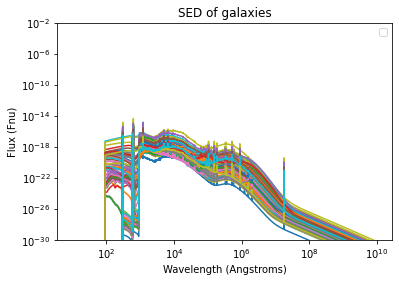

([        wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
  0     1.000000e+01  0.000000    0.000000e+00          0.0            0.0   
  1     1.148154e+01  0.000000    0.000000e+00          0.0            0.0   
  2     1.318257e+01  0.000000    0.000000e+00          0.0            0.0   
  3     1.513561e+01  0.000000    0.000000e+00          0.0            0.0   
  4     1.737801e+01  0.000000    0.000000e+00          0.0            0.0   
  ...            ...       ...             ...          ...            ...   
  4770  9.727472e+09  0.000606    4.129976e+20          0.0            0.0   
  4771  9.772370e+09  0.000606    4.093721e+20          0.0            0.0   
  4772  9.817479e+09  0.000606    4.057778e+20          0.0            0.0   
  4773  9.908319e+09  0.000607    3.986839e+20          0.0            0.0   
  4774  1.000000e+10  0.000607    3.917140e+20          0.0            0.0   
  
        nebular.absorption_old  nebular.absorption_young  neb

In [233]:
get_n_seds(100, restframe=True)

We can see by using this code that we can read in the 'best fit' models of these SEDS and rest frame them using their zpk value. Now we can extend this code as required

No handles with labels found to put in legend.


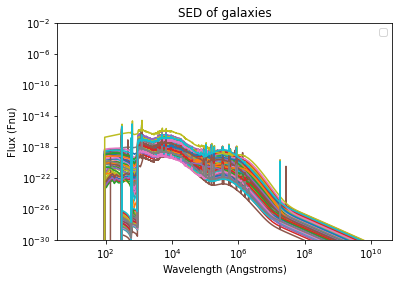

In [234]:
best_fit_seds, names = get_n_seds(100, restframe=True)


In [235]:
best_fit_seds

[        wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
 0     1.000000e+01  0.000000    0.000000e+00          0.0            0.0   
 1     1.148154e+01  0.000000    0.000000e+00          0.0            0.0   
 2     1.318257e+01  0.000000    0.000000e+00          0.0            0.0   
 3     1.513561e+01  0.000000    0.000000e+00          0.0            0.0   
 4     1.737801e+01  0.000000    0.000000e+00          0.0            0.0   
 ...            ...       ...             ...          ...            ...   
 4770  9.727472e+09  0.000015    1.058301e+18          0.0            0.0   
 4771  9.772370e+09  0.000015    1.049011e+18          0.0            0.0   
 4772  9.817479e+09  0.000015    1.039800e+18          0.0            0.0   
 4773  9.908319e+09  0.000015    1.021622e+18          0.0            0.0   
 4774  1.000000e+10  0.000015    1.003762e+18          0.0            0.0   
 
       nebular.absorption_old  nebular.absorption_young  nebular.lines_old

In [236]:
names

0      COSMOS_2213
1     COSMOS_10441
2     COSMOS_16349
3        UDS_14365
4         UDS_3119
          ...     
95      CDFS_27883
96      CDFS_25830
97      CDFS_28769
98     COSMOS_5842
99     COSMOS_1293
Length: 100, dtype: object

In [237]:
# For simplicity, for each of the names, have a dictionary entry with the associated dataframe
# This will make it easier to access the dataframes
# We will also convert the names to a list
names = names.tolist()


In [239]:
names

# setting up the dictionary
best_fit_seds_dict = dict(zip(names, best_fit_seds))


In [240]:
best_fit_seds_dict

{'COSMOS_2213':         wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
 0     1.000000e+01  0.000000    0.000000e+00          0.0            0.0   
 1     1.148154e+01  0.000000    0.000000e+00          0.0            0.0   
 2     1.318257e+01  0.000000    0.000000e+00          0.0            0.0   
 3     1.513561e+01  0.000000    0.000000e+00          0.0            0.0   
 4     1.737801e+01  0.000000    0.000000e+00          0.0            0.0   
 ...            ...       ...             ...          ...            ...   
 4770  9.727472e+09  0.000015    1.058301e+18          0.0            0.0   
 4771  9.772370e+09  0.000015    1.049011e+18          0.0            0.0   
 4772  9.817479e+09  0.000015    1.039800e+18          0.0            0.0   
 4773  9.908319e+09  0.000015    1.021622e+18          0.0            0.0   
 4774  1.000000e+10  0.000015    1.003762e+18          0.0            0.0   
 
       nebular.absorption_old  nebular.absorption_young  ne

In [245]:
# Seperately we would like to just acces best_fit_seds
best_fit_seds


[        wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
 0     1.000000e+01  0.000000    0.000000e+00          0.0            0.0   
 1     1.148154e+01  0.000000    0.000000e+00          0.0            0.0   
 2     1.318257e+01  0.000000    0.000000e+00          0.0            0.0   
 3     1.513561e+01  0.000000    0.000000e+00          0.0            0.0   
 4     1.737801e+01  0.000000    0.000000e+00          0.0            0.0   
 ...            ...       ...             ...          ...            ...   
 4770  9.727472e+09  0.000015    1.058301e+18          0.0            0.0   
 4771  9.772370e+09  0.000015    1.049011e+18          0.0            0.0   
 4772  9.817479e+09  0.000015    1.039800e+18          0.0            0.0   
 4773  9.908319e+09  0.000015    1.021622e+18          0.0            0.0   
 4774  1.000000e+10  0.000015    1.003762e+18          0.0            0.0   
 
       nebular.absorption_old  nebular.absorption_young  nebular.lines_old

Happily we see the best fit SEDS are correct in terms of their restframed shape and position. This means that these SEDS can therefore be used. But this is not all as we also need to explore the other ontributions
which are shown in the dataframe
best_fit_seds